In [1]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from adjustText import adjust_text

In [2]:
team_color = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LAR':'#002147','LAC':'#2072BA',
          'MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C','NYJ':'#203731',
          'LV':'#C4C9CC','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

In [3]:
import_data = nfl.import_seasonal_data([2022])             
wr_season_data = pd.DataFrame(index = import_data.index)
wr_season_data["Player ID"] = import_data["player_id"]
wr_season_data["Receptions"] = import_data["receptions"]
wr_season_data["Targets"] = import_data["targets"]
wr_season_data["Receiving Yards"] = import_data["receiving_yards"]
wr_season_data["Receiving TDs"] = import_data["receiving_tds"]
wr_season_data["Fumbles"] = import_data["receiving_fumbles"]
wr_season_data["Fumbles Lost"] = import_data["receiving_fumbles_lost"]
wr_season_data["Air Yards"] = import_data["receiving_air_yards"]
wr_season_data["YAC"] = import_data["receiving_yards_after_catch"]
wr_season_data["Receiving 1st Downs"] = import_data["receiving_first_downs"]
wr_season_data["Receiving EPA"] = import_data["receiving_epa"]
wr_season_data["Receiving 2pt Conversions"] = import_data["receiving_2pt_conversions"]
wr_season_data["RACR"] = import_data["racr"]
wr_season_data["Target Share"] = import_data["target_share"]
wr_season_data["Air Yards Share"] = import_data["air_yards_share"]
wr_season_data["Games Played"] = import_data["games"]
wr_season_data

,Player ID,Receptions,Targets,Receiving Yards,Receiving TDs,Fumbles,Fumbles Lost,Air Yards,YAC,Receiving 1st Downs,Receiving EPA,Receiving 2pt Conversions,RACR,Target Share,Air Yards Share,Games Played
0,00-0019596,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000,2
1,00-0023459,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000,2
2,00-0026143,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000,2
3,00-0026158,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000,2
4,00-0026498,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,00-0038120,7,10,48.0,1,1.0,1.0,22.0,33.0,3.0,-1.707759,0,3.961905,0.181151,0.072389,2
369,00-0038124,5,7,43.0,0,0.0,0.0,50.0,38.0,1.0,-2.613997,0,0.576271,0.234286,0.216204,2
370,00-0038128,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000,1
371,00-0038129,1,2,4.0,0,0.0,0.0,14.0,4.0,0.0,-1.091860,0,0.285714,0.060606,0.045161,1


In [4]:
import_weekly_data = nfl.import_weekly_data([2022])             
wr_data = pd.DataFrame(index = import_weekly_data.index)
wr_data["Player"] = import_weekly_data["player_name"]
wr_data["Player ID"] = import_weekly_data["player_id"]
wr_data["Team"] = import_weekly_data["recent_team"]
wr_data["Player Full Name"] = import_weekly_data["player_display_name"]
wr_data = wr_data.drop_duplicates(subset=['Player Full Name'])
wr_data.loc[wr_data["Team"] == "LA", "Team"] = "LAR"

Downcasting floats.


In [5]:
wr_merged_season_data = wr_data.merge(wr_season_data, left_on='Player ID', right_on='Player ID')
wr_merged_season_data = wr_merged_season_data.drop(columns=["Player ID"])
#wr_merged_season_data.sort_values(by=['Team'])
wr_merged_season_data.loc[wr_merged_season_data["Team"] == "MIA", :]

,Player,Team,Player Full Name,Receptions,Targets,Receiving Yards,Receiving TDs,Fumbles,Fumbles Lost,Air Yards,YAC,Receiving 1st Downs,Receiving EPA,Receiving 2pt Conversions,RACR,Target Share,Air Yards Share,Games Played
47,R.Mostert,MIA,Raheem Mostert,4,4,44.0,0,0.0,0.0,-3.0,47.0,3.0,2.771988,0,2.400000,0.092258,-0.006120,2
79,T.Hill,MIA,Tyreek Hill,19,25,284.0,2,1.0,0.0,247.0,104.0,11.0,11.919483,0,2.239197,0.647097,0.800446,2
134,R.Cracraft,MIA,River Cracraft,1,2,2.0,1,0.0,0.0,4.0,0.0,1.0,1.262117,0,0.500000,0.040000,0.011050,1
157,C.Wilson,MIA,Cedrick Wilson,2,3,20.0,0,0.0,0.0,25.0,3.0,0.0,-0.523639,0,1.176471,0.084516,0.087484,2
159,T.Sherfield,MIA,Trent Sherfield,3,4,17.0,0,0.0,0.0,23.0,9.0,1.0,-0.306758,0,0.347826,0.104516,0.088462,2
163,C.Edmonds,MIA,Chase Edmonds,5,7,48.0,0,0.0,0.0,17.0,27.0,3.0,3.179914,0,2.352941,0.189032,0.065385,2
170,D.Smythe,MIA,Durham Smythe,2,3,19.0,0,0.0,0.0,16.0,3.0,1.0,0.622431,0,2.416667,0.084516,0.057204,2
172,M.Gesicki,MIA,Mike Gesicki,5,5,42.0,1,0.0,0.0,30.0,12.0,2.0,6.376092,0,1.366667,0.112258,0.082873,2
188,A.Ingold,MIA,Alec Ingold,3,4,23.0,0,0.0,0.0,31.0,17.0,1.0,-0.693990,0,5.285714,0.104516,0.115980,2
245,T.Tagovailoa,MIA,Tua Tagovailoa,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000,2


In [6]:
wr_data_ngs = pd.read_csv("../Resources/ngs_2022_receiving.csv")
wr_data_ngs = wr_data_ngs.loc[wr_data_ngs["week"] == 0, :]
wr_data_ngs = wr_data_ngs.sort_values(by=['team_abbr'])
wr_data_ngs = wr_data_ngs.drop_duplicates(subset=['player_display_name'])
wr_data_full = wr_data_ngs.merge(wr_merged_season_data, left_on='player_display_name', right_on='Player Full Name')
wr_data_full = wr_data_full.drop(columns = ["season", "season_type", "player_first_name", "player_last_name",
                                            "player_jersey_number", "week", "Team", "Player Full Name", "Receptions",
                                           "Targets", "Receiving Yards", "Receiving TDs"])
wr_data_full.columns

Index(['player_display_name', 'player_position', 'team_abbr', 'avg_cushion',
       'avg_separation', 'avg_intended_air_yards',
       'percent_share_of_intended_air_yards', 'receptions', 'targets',
       'catch_percentage', 'yards', 'rec_touchdowns', 'avg_yac',
       'avg_expected_yac', 'avg_yac_above_expectation', 'player_gsis_id',
       'player_short_name', 'Player', 'Fumbles', 'Fumbles Lost', 'Air Yards',
       'YAC', 'Receiving 1st Downs', 'Receiving EPA',
       'Receiving 2pt Conversions', 'RACR', 'Target Share', 'Air Yards Share',
       'Games Played'],
      dtype='object')

In [8]:
wr_data_full = wr_data_full.loc[wr_data_full["targets"] >= 10, :]
wr_data_full = wr_data_full.reset_index()
wr_data_full = wr_data_full.drop(columns = ["index"])
#wr_data_full = wr_data_full.drop(columns = ["level_0"])
wr_data_full

,player_display_name,player_position,team_abbr,avg_cushion,avg_separation,avg_intended_air_yards,percent_share_of_intended_air_yards,receptions,targets,catch_percentage,...,Fumbles Lost,Air Yards,YAC,Receiving 1st Downs,Receiving EPA,Receiving 2pt Conversions,RACR,Target Share,Air Yards Share,Games Played
0,A.J. Green,WR,ARI,4.361818,2.775814,8.308182,17.961518,5,11,45.454545,...,0.0,91.0,9.0,2.0,-6.254663,1,0.636054,0.260047,0.362916,2
1,Zach Ertz,TE,ARI,4.658182,2.873026,5.920667,17.454453,10,15,66.666667,...,0.0,80.0,37.0,6.0,0.351716,1,1.929467,0.345154,0.325385,2
2,Greg Dortch,WR,ARI,6.627692,4.147457,5.844615,14.932883,11,13,84.615385,...,0.0,83.0,65.0,6.0,10.119130,0,3.635177,0.335106,0.320949,2
3,Marquise Brown,WR,ARI,5.565294,2.797478,12.476471,41.685501,10,17,58.823529,...,0.0,195.0,28.0,4.0,-0.004343,0,1.149147,0.400709,0.773005,2
4,Drake London,WR,ATL,8.529474,3.793029,9.337895,37.799604,13,19,68.421053,...,0.0,182.0,56.0,8.0,8.052394,1,1.755803,0.698750,0.777403,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Kyle Philips,WR,TEN,7.348000,2.910280,7.053000,14.665946,7,10,70.000000,...,0.0,72.0,18.0,3.0,0.257446,0,0.880000,0.335777,0.243695,2
74,Jahan Dotson,WR,WAS,5.950000,3.728713,16.703000,23.186374,7,10,70.000000,...,0.0,144.0,10.0,6.0,8.323920,1,1.364551,0.235588,0.419849,2
75,Logan Thomas,TE,WAS,5.282857,3.584226,11.500000,17.560177,6,11,54.545455,...,0.0,139.0,31.0,3.0,1.467412,0,1.179089,0.259978,0.409672,2
76,Terry McLaurin,WR,WAS,4.491667,1.760329,15.728333,26.200061,6,12,50.000000,...,0.0,183.0,45.0,5.0,6.720269,0,1.467778,0.279379,0.522035,2


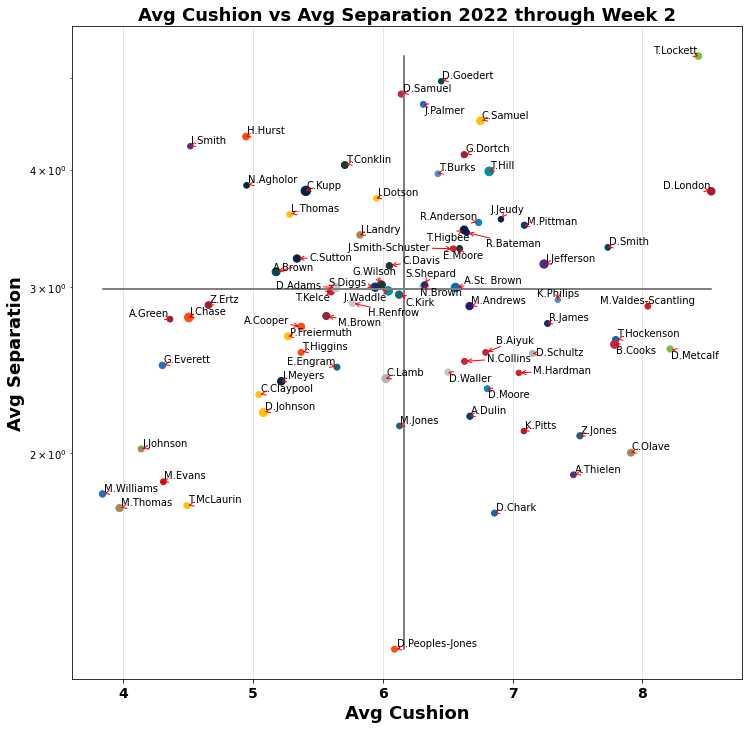

In [9]:
wr_graph = wr_data_full[["player_short_name", "avg_cushion", "avg_separation", "team_abbr", "targets"]]

x = wr_graph["avg_cushion"]
y = wr_graph["avg_separation"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Avg Cushion', fontsize=18, fontweight = "bold")
plt.ylabel('Avg Separation', fontsize=18, fontweight = "bold")
plt.yscale('log')
plt.title('Avg Cushion vs Avg Separation 2022 through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

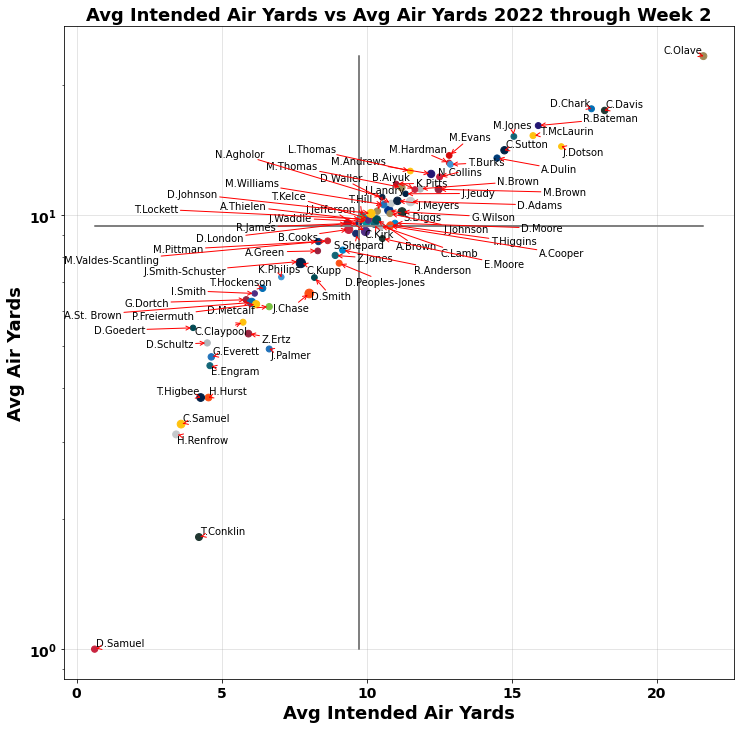

In [10]:
wr_graph = wr_data_full[["player_short_name", "avg_intended_air_yards", "Air Yards", "team_abbr", "targets"]]

x = wr_graph["avg_intended_air_yards"]
y = wr_graph["Air Yards"]/wr_graph["targets"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Avg Intended Air Yards', fontsize=18, fontweight = "bold")
plt.ylabel('Avg Air Yards', fontsize=18, fontweight = "bold")
plt.yscale('log')
plt.title('Avg Intended Air Yards vs Avg Air Yards 2022 through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

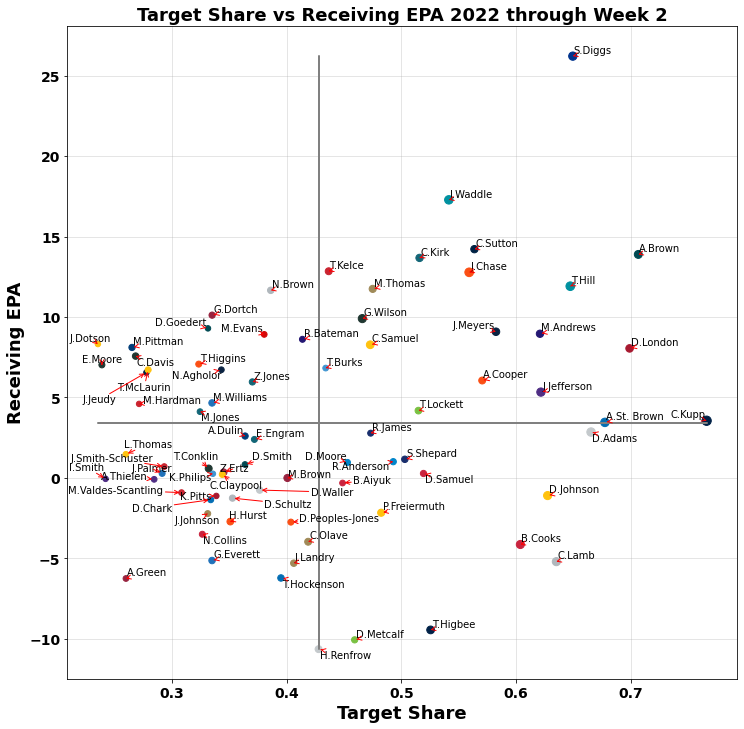

In [20]:
wr_graph = wr_data_full[["player_short_name", "Target Share", "Receiving EPA", "team_abbr", "targets"]]

x = wr_graph["Target Share"]
y = wr_graph["Receiving EPA"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Target Share', fontsize=18, fontweight = "bold")
plt.ylabel('Receiving EPA', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('Target Share vs Receiving EPA 2022 through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.savefig('Images/TargetShare_vs_RecEPA', dpi=400)
plt.show()

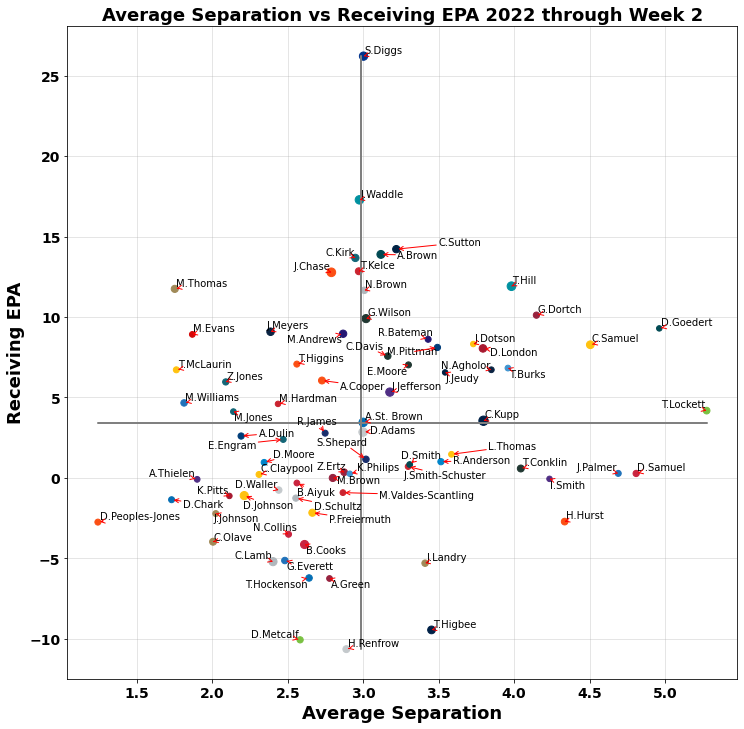

In [12]:
wr_graph = wr_data_full[["player_short_name", "avg_separation", "Receiving EPA", "team_abbr", "targets"]]

x = wr_graph["avg_separation"]
y = wr_graph["Receiving EPA"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Average Separation', fontsize=18, fontweight = "bold")
plt.ylabel('Receiving EPA', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('Average Separation vs Receiving EPA 2022 through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

In [15]:
wr_data_pfr = pd.read_csv("../Resources/advstats_season_rec.csv")
wr_data_pfr = wr_data_pfr.loc[wr_data_pfr["season"] == 2022, :]
wr_data_pfr = wr_data_pfr.drop(columns=["season", "tm", "pfr_id", "age", "pos", "gs", "tgt", "rec","yds", "td",
                                        "loaded"])
wr_data_all = wr_data_full.merge(wr_data_pfr, left_on='player_display_name', right_on='player')
wr_data_all.columns

Index(['player_display_name', 'player_position', 'team_abbr', 'avg_cushion',
       'avg_separation', 'avg_intended_air_yards',
       'percent_share_of_intended_air_yards', 'receptions', 'targets',
       'catch_percentage', 'yards', 'rec_touchdowns', 'avg_yac',
       'avg_expected_yac', 'avg_yac_above_expectation', 'player_gsis_id',
       'player_short_name', 'Player', 'Fumbles', 'Fumbles Lost', 'Air Yards',
       'YAC', 'Receiving 1st Downs', 'Receiving EPA',
       'Receiving 2pt Conversions', 'RACR', 'Target Share', 'Air Yards Share',
       'Games Played', 'player', 'g', 'x1d', 'ybc', 'ybc_r', 'yac', 'yac_r',
       'adot', 'brk_tkl', 'rec_br', 'drop', 'drop_percent', 'int', 'rat'],
      dtype='object')

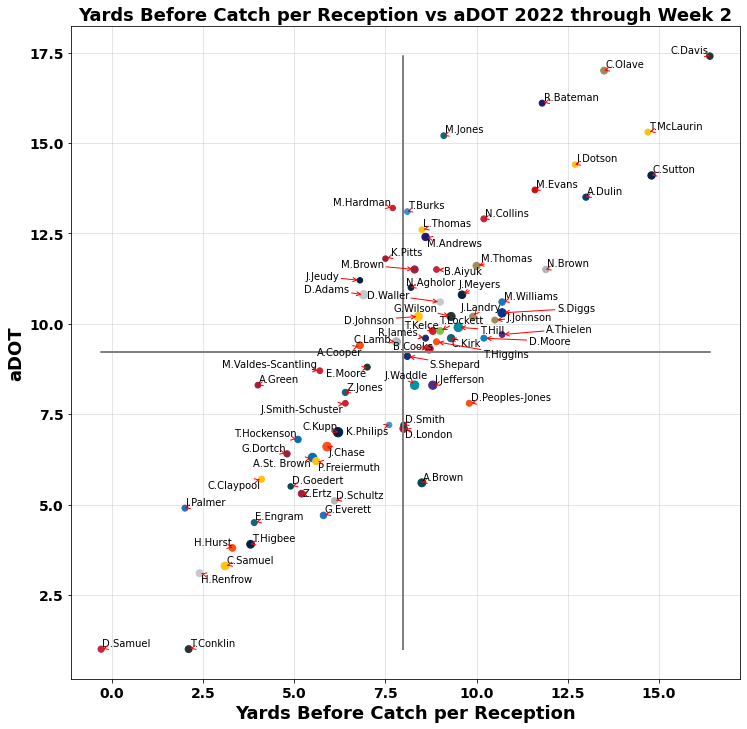

In [17]:
wr_graph = wr_data_all[["player_short_name", "ybc_r", "adot", "team_abbr", "targets"]]

x = wr_graph["ybc_r"]
y = wr_graph["adot"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Yards Before Catch per Reception', fontsize=18, fontweight = "bold")
plt.ylabel('aDOT', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('Yards Before Catch per Reception vs aDOT 2022 through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

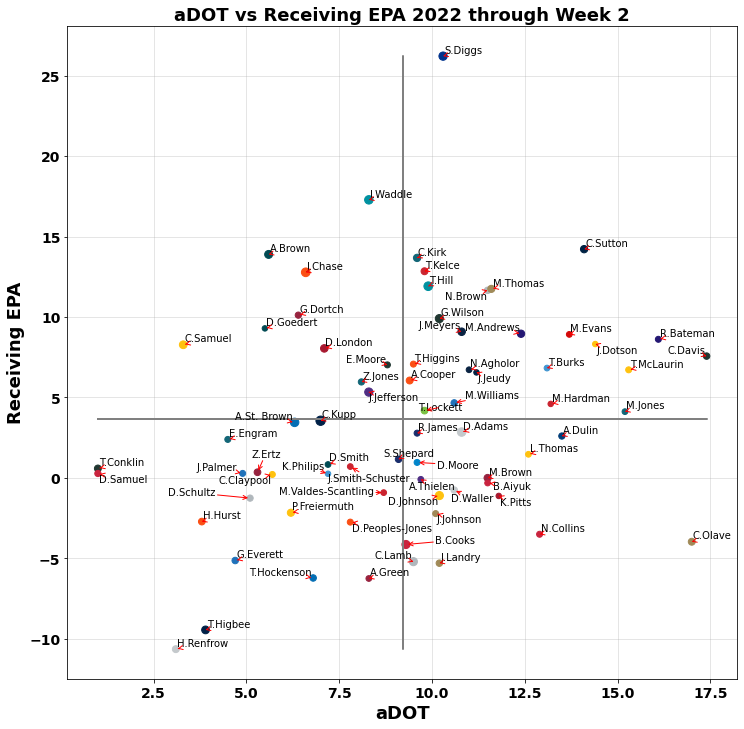

In [21]:
wr_graph = wr_data_all[["player_short_name", "adot", "Receiving EPA", "team_abbr", "targets"]]

x = wr_graph["adot"]
y = wr_graph["Receiving EPA"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('aDOT', fontsize=18, fontweight = "bold")
plt.ylabel('Receiving EPA', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('aDOT vs Receiving EPA 2022 through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.savefig('Images/aDot_vs_RecEPA', dpi=400)
plt.show()

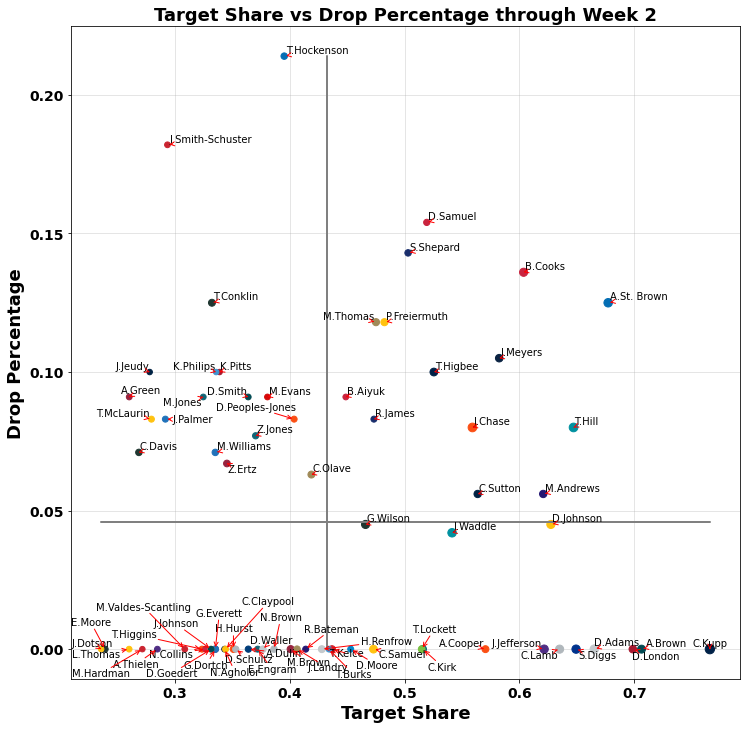

In [19]:
wr_graph = wr_data_all[["player_short_name", "Target Share", "drop_percent", "team_abbr", "targets"]]

x = wr_graph["Target Share"]
y = wr_graph["drop_percent"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Target Share', fontsize=18, fontweight = "bold")
plt.ylabel('Drop Percentage', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('Target Share vs Drop Percentage through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()